<a href="https://colab.research.google.com/github/shihab-iiuc/Linear-Regression-learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv("/content/nasdaq100_simplified.csv")

df.drop(columns=['Date'])





,Open,Close
0,174.91,170.22
1,290.14,291.51
2,246.40,244.54
3,219.73,219.82
4,131.20,135.28
...,...,...
495,251.74,255.18
496,235.68,233.36
497,251.25,247.82
498,268.39,271.92


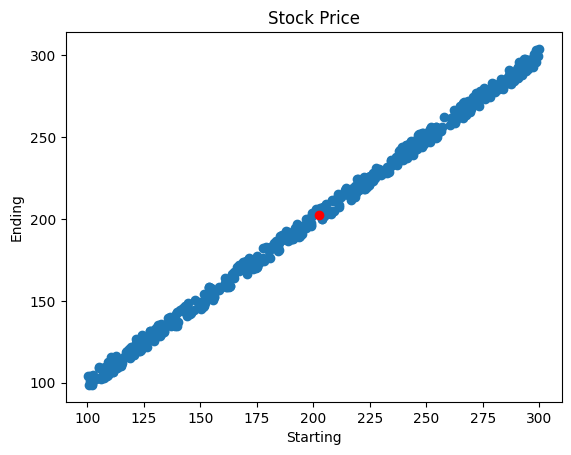

In [ ]:
plt.scatter(df['Open'],df['Close'])
plt.scatter(df['Open'].mean(),df['Close'].mean(),color="red")
plt.xlabel('Starting')
plt.ylabel('Ending')
plt.title('Stock Price')
plt.show()

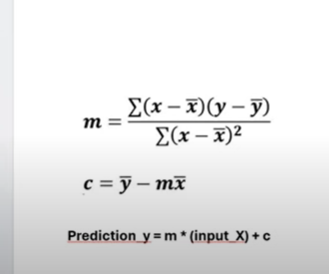

if we calculate one residual then it is loss






TOTAL LOSS WILL BE COST

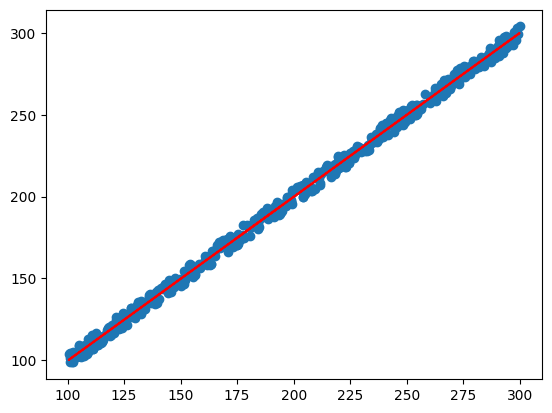

In [52]:
from sklearn.linear_model import LinearRegression
x=df[['Open']]
y=df[['Close']]

model=LinearRegression()
model.fit(x,y)
model.coef_
model.intercept_
plt.scatter(x,y)
plt.plot(x,model.predict(x),color='red')
plt.show()

In [ ]:
df['y_predict']=model.predict(x)

df.head()

,Date,Open,Close,y_predict
0,2023-01-02,174.91,170.22,174.676649
1,2023-01-03,290.14,291.51,290.020803
2,2023-01-04,246.40,244.54,246.237471
3,2023-01-05,219.73,219.82,219.541050
4,2023-01-06,131.20,135.28,130.923347


# Loss and Cost Function


In [ ]:
df['Lose']=df['Close']-df['y_predict']
df.head()



,Date,Open,Close,y_predict,Lose
0,2023-01-02,174.91,170.22,174.676649,-4.456649
1,2023-01-03,290.14,291.51,290.020803,1.489197
2,2023-01-04,246.40,244.54,246.237471,-1.697471
3,2023-01-05,219.73,219.82,219.541050,0.278950
4,2023-01-06,131.20,135.28,130.923347,4.356653


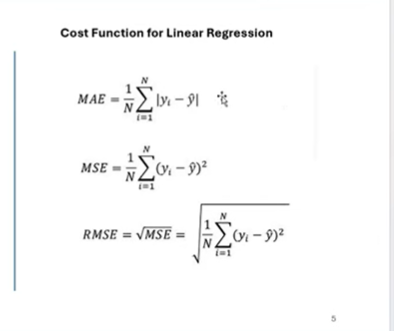

In [ ]:
#mse
from sklearn.metrics import mean_squared_error,mean_absolute_error
#mse is worldwise used
mse=mean_squared_error(df['Close'],df['y_predict'])
print(f"Mean Squared Error:{mse:.3f}")
mae=mean_absolute_error(df['Close'],df['y_predict'])
print(f"Mean Absolute Error:{mae:3f}")


Mean Squared Error:8.293
Mean Absolute Error:2.484978


**Score is used for model performance**

In [ ]:
model.score(x,y)

0.9976640371031187

# Another method of calculate the performance of model is R²
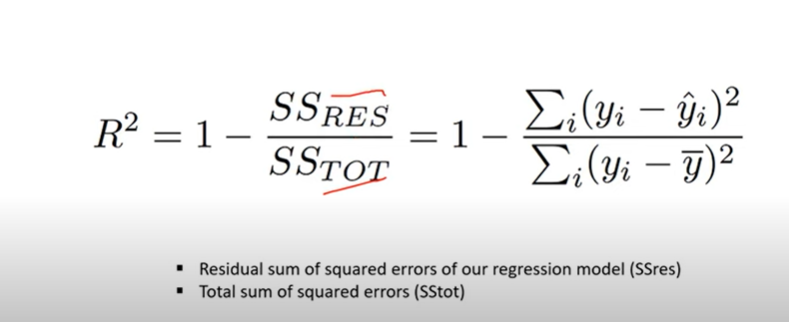

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(df['Close'],df['y_predict'])
print(f"r2_score:{r2}")

r2_score:0.9976640371031187


*Car Risk analysis*

In [81]:
ra=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car driving risk analysis.csv')
ra

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72
5,115,10
6,50,7
7,230,85
8,190,45
9,260,91


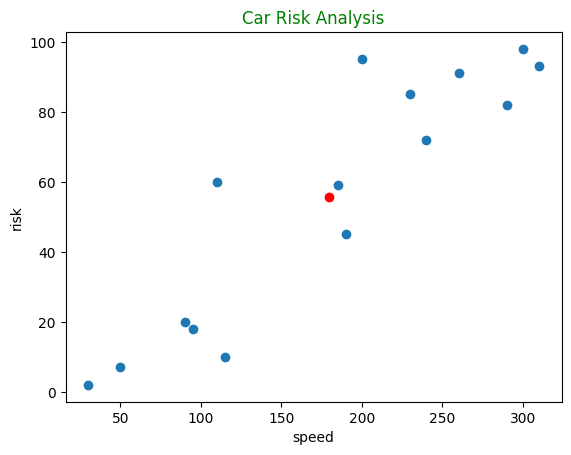

In [82]:
plt.scatter(ra['speed'],ra['risk'])
plt.scatter(ra['speed'].mean(),ra['risk'].mean(),color='Red')
plt.xlabel('speed')
plt.ylabel('risk')
plt.title('Car Risk Analysis',color='Green')
plt.show()

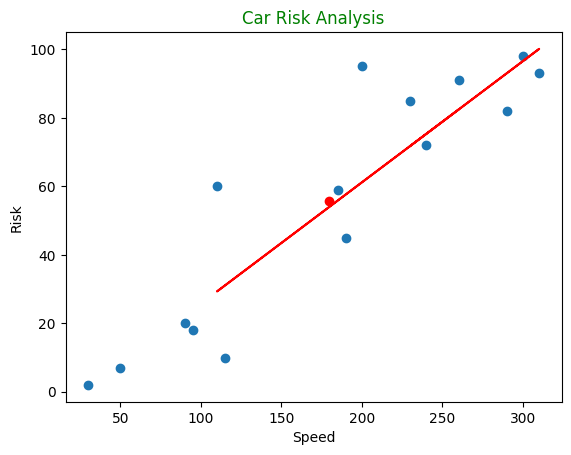

In [86]:
from sklearn.model_selection import train_test_split
riskanalysis=LinearRegression()
a=ra[['speed']]
b=ra[['risk']]
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.4,random_state=13)
riskanalysis.fit(a_train,b_train)
plt.plot(a_test, riskanalysis.predict(a_test), color='red')
plt.scatter(ra['speed'], ra['risk'])
plt.scatter(ra['speed'].mean(), ra['risk'].mean(), color='Red')
plt.xlabel('Speed')
plt.ylabel('Risk')
plt.title('Car Risk Analysis', color='Green')
plt.show()


In [87]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.4, random_state=13)
riskanalysis.fit(a_train, b_train)
predicted_risk = riskanalysis.predict(a_test)
ra = pd.DataFrame({
    'risk': b_test['risk'].values,  # Extract the 1D 'speed' values from b_test
    'predicted_risk': predicted_risk.flatten()  # Flatten predicted_risk to 1D
})
ra['Lose_risk'] = ra['risk'] - ra['predicted_risk']

ra.head()

,risk,predicted_risk,Lose_risk
0,85,71.793084,13.206916
1,93,100.119615,-7.119615
2,59,55.859410,3.140590
3,10,31.073696,-21.073696
4,60,29.303288,30.696712


In [88]:
print(f"mse:{mean_squared_error(ra['risk'],ra['predicted_risk'])}")
print(f"mae:{mean_absolute_error(ra['risk'],ra['predicted_risk'])}")


mse:282.5094533656244
mae:13.970332577475434


In [94]:
riskanalysis.score(a_test, b_test)

0.6565466594231231

In [89]:
print(f"r2_score: {r2_score(ra['risk'], ra['predicted_risk'])}")

r2_score: 0.6565466594231231


# Linear Regression for Multiple Variables

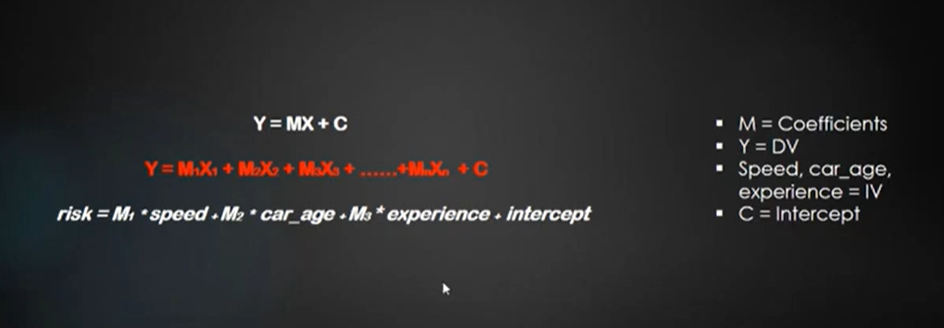